In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


In [2]:
# Load the datasets
train_data = pd.read_csv('../../dataset/train.csv')
test_data = pd.read_csv('../../dataset/test.csv')

In [3]:
# Display dataset info
print("Train Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB
None


C:\Users\iamte\AppData\Local\Temp\ipykernel_16864\906206718.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='label', palette='viridis')


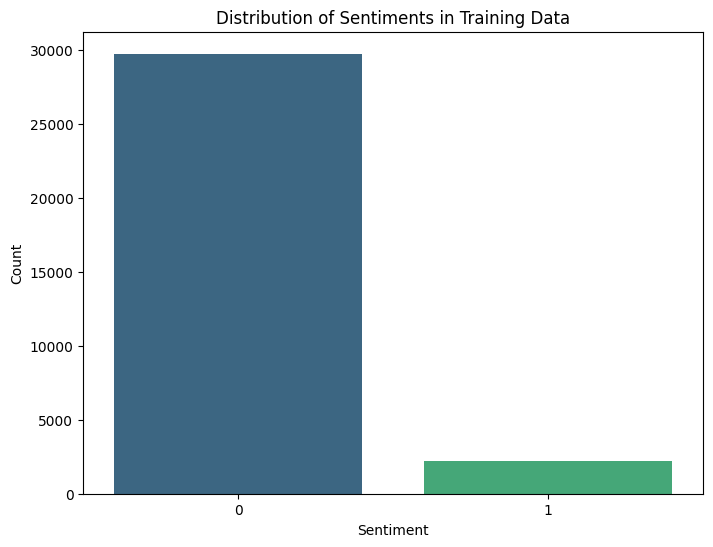

In [4]:
# Visualize the distribution of sentiments in the training dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='label', palette='viridis')
plt.title('Distribution of Sentiments in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [5]:
# Extract features and labels from the training dataset
X_train_raw = train_data['tweet']  # Tweets
y_train = train_data['label']    # Sentiment labels

In [6]:
# Extract features from the testing dataset
X_test_raw = test_data['tweet']

In [7]:
# Preprocessing: Convert text data into numerical format using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

In [8]:
# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [9]:
# Predict sentiments on the test set
y_pred = nb_model.predict(X_test)

In [10]:
# Add predictions to the test dataset
test_data['Predicted_Label'] = y_pred

In [11]:
# Save the results to a new CSV file
test_data.to_csv('naivebayes_predictions.csv', index=False)

print("Predictions saved to 'naivebayes_predictions.csv'")

Predictions saved to 'naivebayes_predictions.csv'


C:\Users\iamte\AppData\Local\Temp\ipykernel_16864\2822078167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='cool')


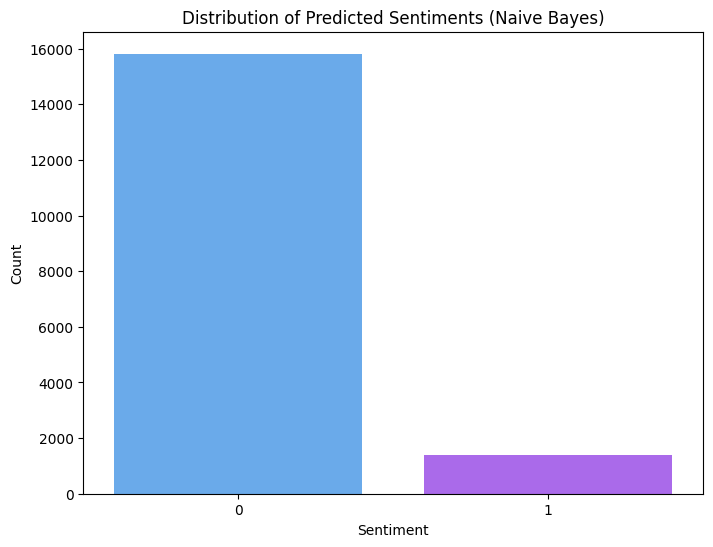

In [12]:
# Visualize the distribution of predicted sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred, palette='cool')
plt.title('Distribution of Predicted Sentiments (Naive Bayes)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()